In [92]:
# Initialize Otter
import otter
grader = otter.Notebook("csc475-575-Spring2022-assignment5.ipynb")

# CSC475/575 Spring 2022 - Assignment 5

This assignment covers topics related to dynamic time warping. Information about the course can be found at the 
[CSC475/575 Brightspace](https://bright.uvic.ca/d2l/home/196001). 


* A4.1: Cross-similarity matrix    
* A4.2: Self-similarity matrix   
* A4.3: Cross-similarity and time-stretching   
* A4.4: Harmonic/percussive and self-similarity matrix    
* A4.5: Dynamic time warping to estimate time stretching 

CSC575 only (instead of A4.1): 
* A4.G: Analysis of Chopin performances using DTW 

Each question is worth 2 points for a total of 10 points for the assignment. 


In [93]:
import numpy as np
import random
import IPython.display as ipd
import matplotlib.pyplot as plt
import math 
%matplotlib inline
import otter
grader = otter.Notebook()
import scipy.io.wavfile as wav
import librosa

#### **Question A5.1 (basic):** 
 
Consider the recording `jazz.00006.wav` from the GTZAN collection. Repeat the 30 second recording to create a one minute recording. Plot the cross-similarity matrix (https://librosa.org/doc/latest/generated/librosa.segment.cross_similarity.html)
for this new one minute long clip with the original 30 second recording. Describe how the repetition can be visually observed in the plot of the cross-similarity matrix. Use MFCC features and the affinity mode.

 (**Basic: 2 points**)


In [94]:
srate,audio = wav.read('jazz.00006.wav')
audio_ext = np.concatenate((audio,audio))
wav.write('ext_jazz.00006.wav',srate,audio_ext)

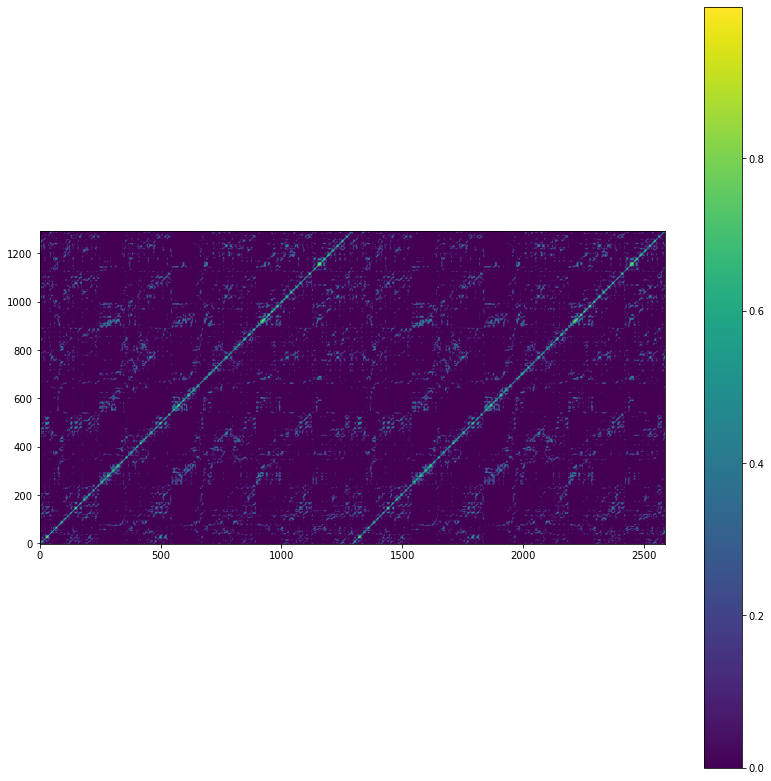

In [95]:
audio = audio.astype(np.float32)
audio_ext = audio_ext.astype(np.float32)
mfcc = librosa.feature.mfcc(y=audio,sr=srate)
mfcc_ext = librosa.feature.mfcc(y=audio_ext,sr=srate)
xsim = librosa.segment.cross_similarity(mfcc_ext,mfcc,mode='affinity')

#xsim = np.dot(np.transpose(mfcc),mfcc_ext)
plt.figure(figsize=(14,14))
plt.imshow(xsim,cmap = 'viridis',origin='lower')
plt.colorbar()
plt.show()

**The repetetion can be identified by the diagnols spanning the exactly half of the 1min clip. This shows that the 30sec clip is similar to 30sec parts of the 1min clip, which is actually the case.**

#### **Question A5.2 (basic):** 

Plot the self-similarity matrix for your original 30 second clip (i.e the cross-similarity to itself). Visually identify a repeating structure (it could be a bar, a phrase, a segment) on the self-similarity matrix, describe it, and generate two audio fragments that demonstrate this repetition. Hint: repetition shows as block structure, you will need to map the dimensions of the repeating block to time to select the audio fragments.


(**Basic: 2 points**)


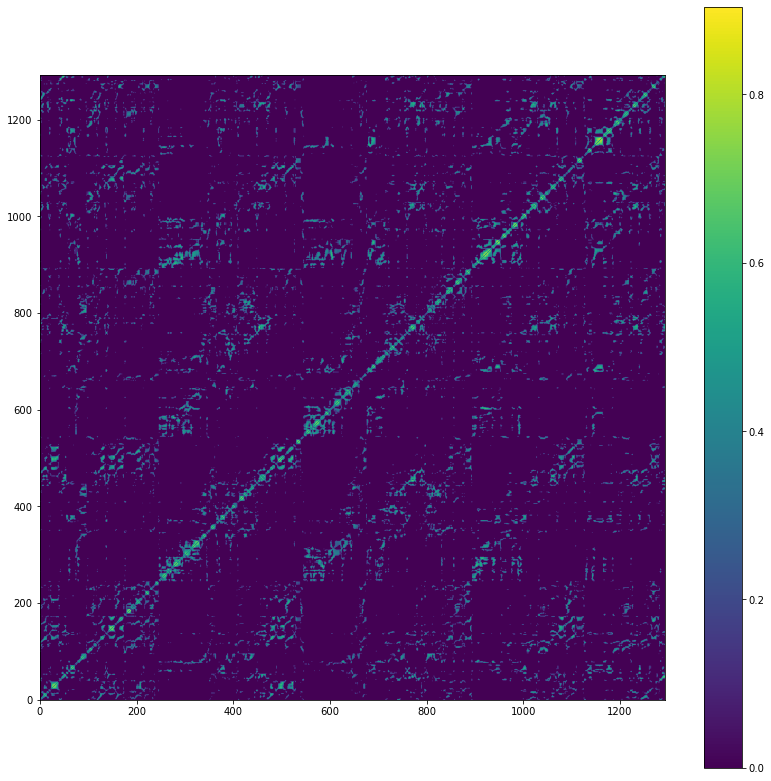

In [96]:
srate,audio = wav.read('jazz.00006.wav')
audio = audio.astype(np.float32)
mfcc = librosa.feature.mfcc(y=audio,sr=srate)
ssm1 = librosa.segment.cross_similarity(mfcc,mfcc,mode='affinity')
#ssm1 = np.dot(np.transpose(mfcc),mfcc)
# print(srate)
# print(len(audio))
# print(len(audio)/srate)
# print(len(ssm1))

plt.figure(figsize=(14,14))
cmap = 'viridis'
plt.imshow(ssm1, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

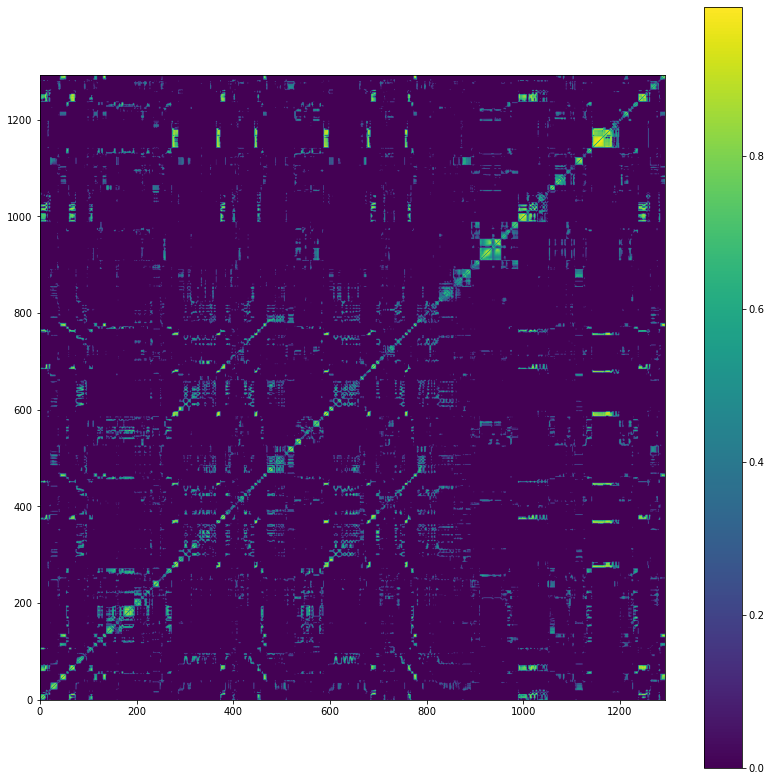

In [97]:
srate,audio = wav.read('jazz.00006.wav')
audio = audio.astype(np.float32)
chroma = librosa.feature.chroma_stft(y=audio,sr=srate,norm=2)
ssm1 = librosa.segment.cross_similarity(chroma,chroma,mode='affinity')
#ssm1 = np.dot(np.transpose(mfcc),mfcc)
# print(srate)
# print(len(audio))
# print(len(audio)/srate)
# print(len(ssm1))

plt.figure(figsize=(14,14))
cmap = 'viridis'
plt.imshow(ssm1, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

**On the ssm with chroma features we see at frames 300-500 on the x axis a structure parrallel to the diagnol on its top side; and on frames 600-800 we see a similar structure parrallel to the diagnol but on the bottom side. The segments have been generated below. The time was mapped as - frame_number*(len(audio)/len(feature vector))<br>
eg. frame 300 maps to 300*(661794/1293) = 153548**

In [98]:
segment1 = audio[153548:255914]

In [99]:
ipd.Audio(segment1, rate=srate)

In [100]:
segment2 = audio[307097:409463]

In [101]:
ipd.Audio(segment2, rate=srate)

**Question A5.3 (expected):** 

Use [time stretching](https://librosa.org/doc/latest/generated/librosa.effects.time_stretch.html) on your audio recording to create the following modified signal: the first 10 seconds should be slowed down (rate 0.75), the middle 10 seconds should remain the same, and the last 10 seconds should be sped up (rate 1.25). Plot the cross-similarity matrix between the original and modified recording (use MFCC features and the affinity mode) and describe how the time-stretching can be observed visually.



**(2 points)** 


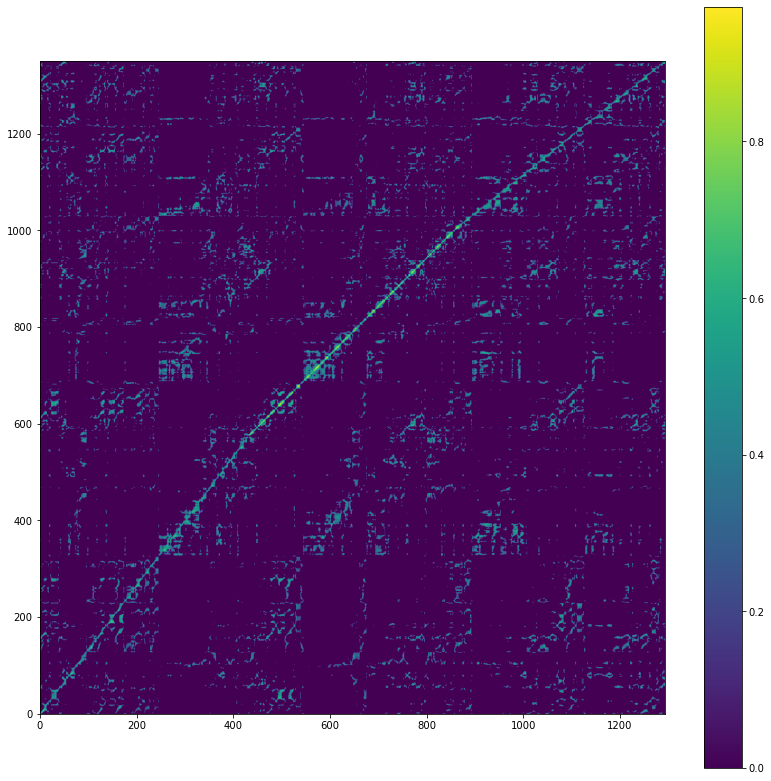

In [102]:
srate,audio = wav.read('jazz.00006.wav')
audio = audio.astype(np.float32)
size = int(len(audio)/3)
audio1 = audio[0:size]
audio2 = audio[size:2*size]
audio3 = audio[2*size:]

audio1 = librosa.effects.time_stretch(audio1, rate=0.75)
audio3 = librosa.effects.time_stretch(audio3, rate=1.25)

audio_ts = np.concatenate((audio1,audio2,audio3))


mfcc = librosa.feature.mfcc(y=audio,sr=srate)
mfcc_ts = librosa.feature.mfcc(y=audio_ts,sr=srate)
ssm1 = librosa.segment.cross_similarity(mfcc,mfcc_ts,mode='affinity')
#ssm1 = np.dot(np.transpose(mfcc),mfcc)
plt.figure(figsize=(14,14))
cmap = 'viridis'
plt.imshow(ssm1, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

**For the first 10 sec of the matrix we can see the diagnol bending upwards corresponding to the slowed down track; the middle 10 sec snaps back into place as it is unedited; the last 10 sec bends downwards corresponding to the speedup of the track.**

<!-- BEGIN QUESTION -->

#### **Question A5.4 (expected):** 

Use harmonic/percussive sound source separation to generate a percussive track and a harmonic track from your 30 second example. Plot the self-similarity matrices using affinity for the percussive and harmonic versions using MFCCs as well as Chroma (use chroma_cqt or chroma_stft). Based on the resulting four plots discuss feature set works better for each configuration (harmonic/percussive).

In [103]:
srate,y = wav.read('jazz.00006.wav')
y = y.astype(np.float32)
D = librosa.stft(y)
D_harmonic, D_percussive = librosa.decompose.hpss(D)

y_harmonic = librosa.istft(D_harmonic, length=len(y))
y_percussive = librosa.istft(D_percussive, length=len(y))

mfcc_harm = librosa.feature.mfcc(y=y_harmonic,sr=srate)
mfcc_perc = librosa.feature.mfcc(y=y_percussive,sr=srate)

chroma_harm = librosa.feature.chroma_stft(y=y_harmonic,sr=srate,norm=2)
chroma_perc = librosa.feature.chroma_stft(y=y_percussive,sr=srate,norm=2)

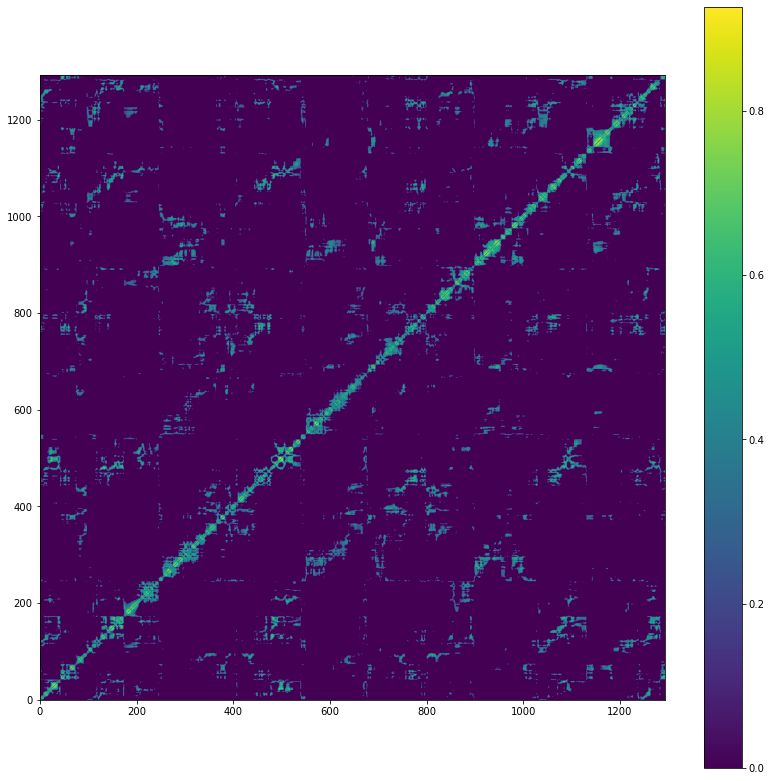

In [104]:
ssm1 = librosa.segment.cross_similarity(mfcc_harm,mfcc_harm,mode='affinity')
#ssm1 = np.dot(np.transpose(mfcc_harm),mfcc_harm)
plt.figure(figsize=(14,14))
cmap = 'viridis'
plt.imshow(ssm1, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

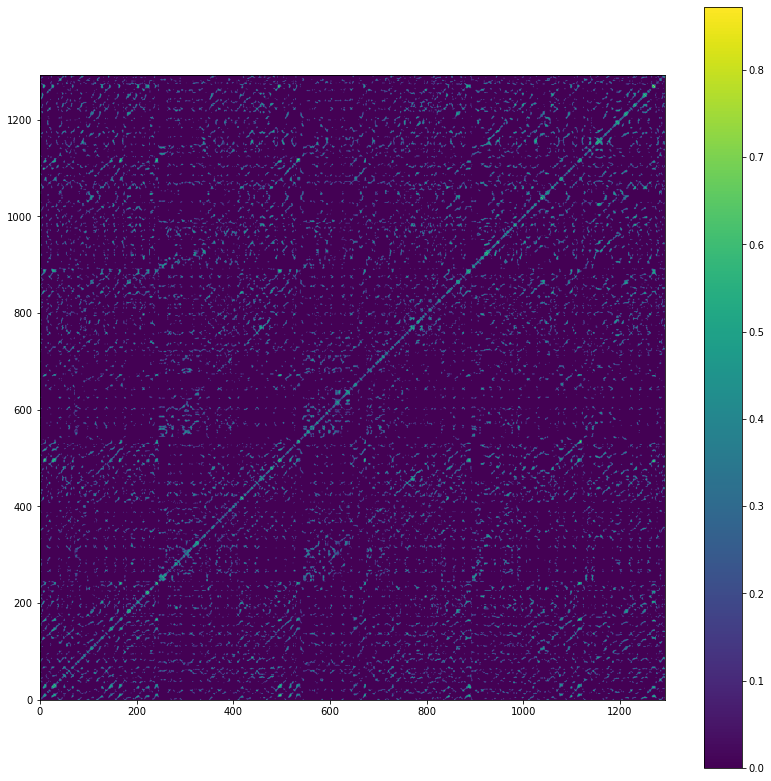

In [105]:
ssm1 = librosa.segment.cross_similarity(mfcc_perc,mfcc_perc,mode='affinity')
#ssm1 = np.dot(np.transpose(mfcc_perc),mfcc_perc)
plt.figure(figsize=(14,14))
cmap = 'viridis'
plt.imshow(ssm1, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

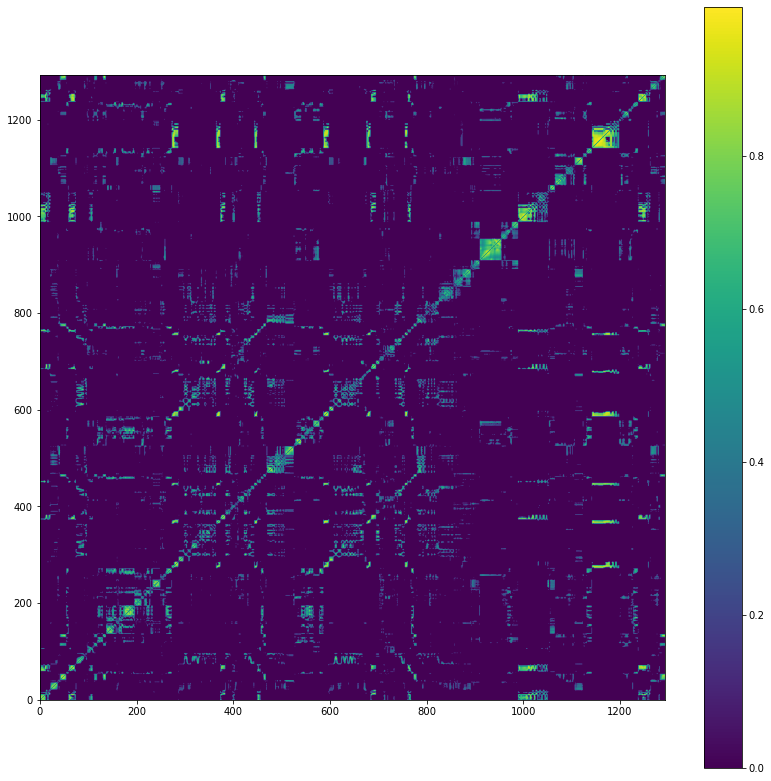

In [106]:
ssm1 = librosa.segment.cross_similarity(chroma_harm,chroma_harm,mode='affinity')
#ssm1 = np.dot(np.transpose(chroma_harm),chroma_harm)
plt.figure(figsize=(14,14))
cmap = 'viridis'
plt.imshow(ssm1, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

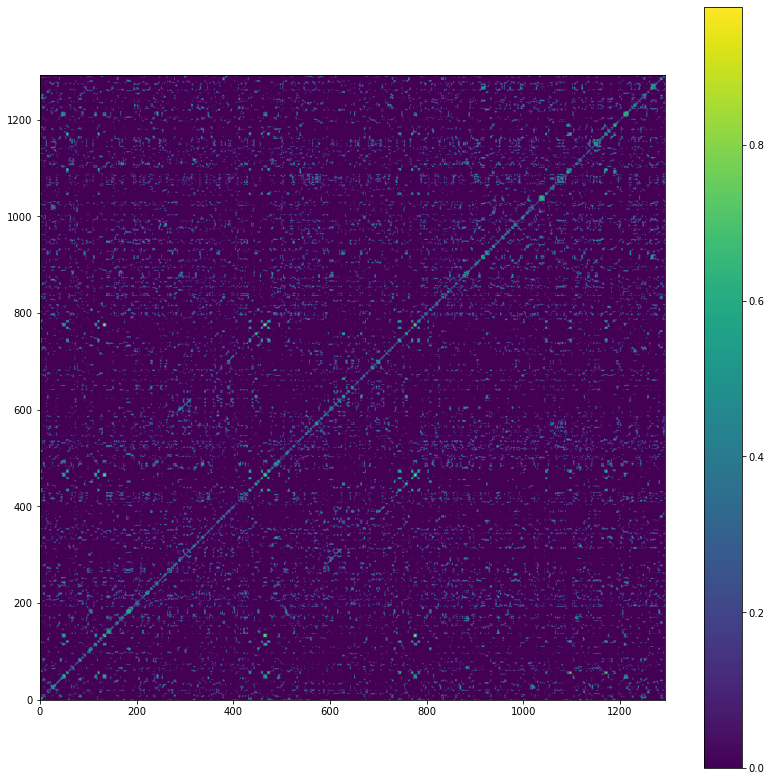

In [107]:
ssm1 = librosa.segment.cross_similarity(chroma_perc,chroma_perc,mode='affinity')
#ssm1 = np.dot(np.transpose(chroma_perc),chroma_perc)
plt.figure(figsize=(14,14))
cmap = 'viridis'
plt.imshow(ssm1, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

**Based on these matrices mfcc features show more details and segments of repetion for percussive track.<br>
While chroma features present way more interpretable similarity matrix for harmonic track.**

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question A5.5 (advanced):** 

Use Dynamic Time Warping using the original and modified (time-stretched) recording you created in the previous subquestion. Plot the cost matrix and associated optimal path and describe how the optimal path reflects the time stretching. Show how you can estimate the time-stretching rates from the optimal path. You can assume that you know that the rate is going to change every 10 seconds but you don’t know what the corresponding rates are. Test your procedure with a set of different time stretching rates.



 

**(2 points)**


In [108]:
srate,audio = wav.read('jazz.00006.wav')
audio = audio.astype(np.float32)
size = int(len(audio)/3)
audio1 = audio[0:size]
audio2 = audio[size:2*size]
audio3 = audio[2*size:]

audio1 = librosa.effects.time_stretch(audio1, rate=0.75)
audio3 = librosa.effects.time_stretch(audio3, rate=1.25)

audio_ts = np.concatenate((audio1,audio2,audio3))

In [109]:
def rms_track(signal, hopSize, winSize): 
    offsets = np.arange(0, len(signal), hopSize)
    amp_track = np.zeros(len(offsets))
    
    for (m,o) in enumerate(offsets): 
        frame = signal[o:o+winSize] 
        amp_track[m] = np.sqrt(np.mean(np.square(frame)))         
    return amp_track


hopsize = 8192
winsize = 8192

audio = rms_track(audio, hopsize, winsize)
audio_ts = rms_track(audio_ts, hopsize, winsize)

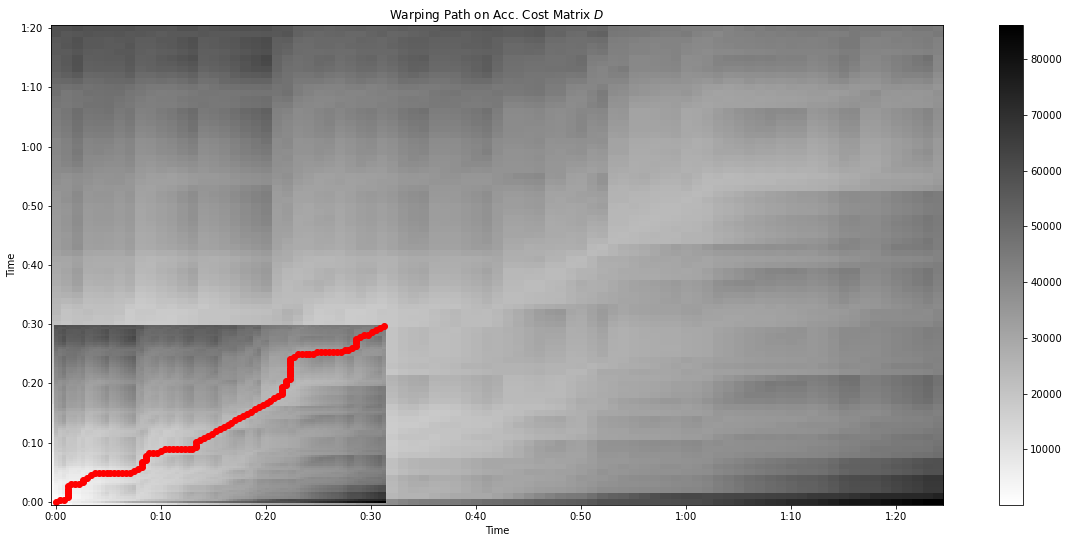

In [110]:
import librosa.core
import librosa.display

def plot_dtw(x,y,srate,ax): 
    hop_size = 8192
    D, wp = librosa.sequence.dtw(X=x, Y=y, metric='euclidean')
    wp_s = np.asarray(wp) * hop_size / srate

    librosa.display.specshow(D, x_axis='time', y_axis='time',
                             cmap='gray_r', hop_length=hop_size,sr=srate)
    imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                     origin='lower', interpolation='nearest', aspect='auto')
    ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
    plt.title('Warping Path on Acc. Cost Matrix $D$')
    plt.colorbar()
    return plt, wp 

audio = audio.reshape(1,-1)
audio_ts = audio_ts.reshape(1,-1)

fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(311)
plot1,wp1 = plot_dtw(audio, audio_ts, srate, ax)


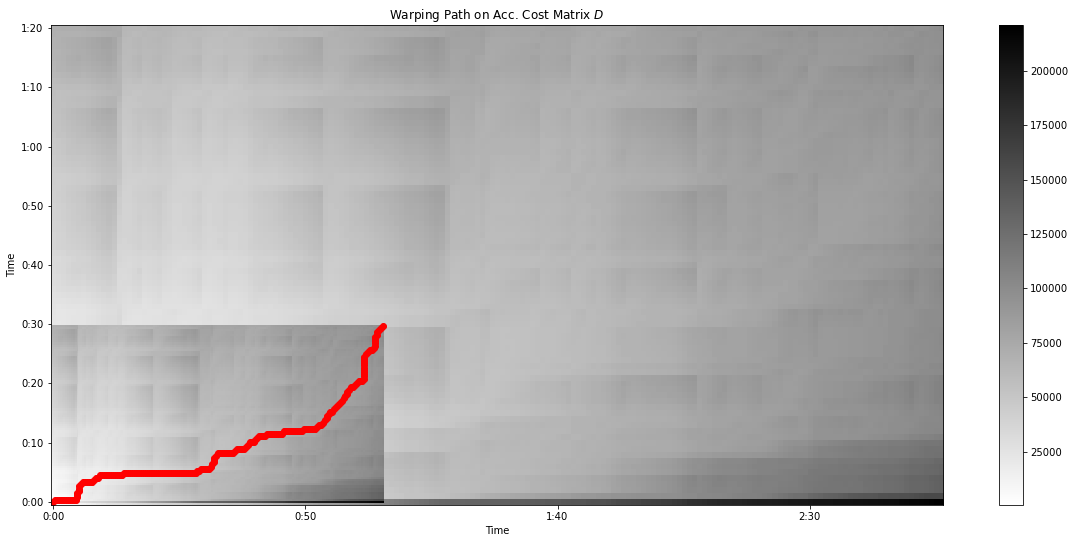

In [111]:
srate,audio = wav.read('jazz.00006.wav')
audio = audio.astype(np.float32)
size = int(len(audio)/3)
audio1 = audio[0:size]
audio2 = audio[size:2*size]
audio3 = audio[2*size:]

audio1 = librosa.effects.time_stretch(audio1, rate=0.2)
audio3 = librosa.effects.time_stretch(audio3, rate=1.75)

audio_ts = np.concatenate((audio1,audio2,audio3))

hopsize = 8192
winsize = 8192

audio = rms_track(audio, hopsize, winsize)
audio_ts = rms_track(audio_ts, hopsize, winsize)

audio = audio.reshape(1,-1)
audio_ts = audio_ts.reshape(1,-1)

fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(311)
plot1,wp1 = plot_dtw(audio, audio_ts, srate, ax)

**One possible way to determing rate of time stretch based on the two experiments is to compare the average slope of each 10sec segment. This way the first experiment would yield a ratio of 0.75:1:1.25**

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### **Question A4.G (CSC575/advanced):** 

This question only needs to be answered by graduate students who are registered in CSC575 and for these students it will be graded instead of question A4.1 which is optional for them. 

Consider the following dataset containing piano performances by 22 different pianists of two pieces by Chopin: https://iwk.mdw.ac.at/goebl/mp3.html

1. Convert each piece to a sequence of chroma-cqt vectors 
2. Consider pianist 01 as your reference 
3. Calculate the alignment cost between each pianist and and pianist 01 (22 alignemnt scores) 
4. Find the most and least aligned performances for each piece to the 01 pianist 

This type of detailed analysis of timing could provide valuable insights about how pianist use expressive time when performing music. 


<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()